<span style="font-size:3em;font-weight:500">Стабилизация перевёрнутого маятника с неподвижной осью подвеса</span>

<span style="font-size:2em;font-weight:500">Расчётно-графическая работа для лабораторного практикума. Задания. Часть 1. Линейные и нелинейные стратегии управления</span>

**Автор: В. А. Костин**  

**2025 год**
$\newcommand{\ctg}{\mathop{\mathrm{ctg}}\nolimits}$
$\newcommand{\tg}{\mathop{\mathrm{tg}}\nolimits}$
$\newcommand{\arctg}{\mathop{\mathrm{arctg}}\nolimits}$
$\newcommand{\degree}{^{\circ}}$
$\renewcommand{\Re}{\mathop{\mathrm{Re}}\nolimits}$
$\newcommand{\D}{\mathrm{d}}$

# Задание 1. Инициализация параметров маятника

*Запишите в соответствующие переменные номер группы, фамилию, имя и отчество выполняющего работу.* *После этого запустите на выполнение изменённую ячейку и три следующие ячейки с кодом*. Запустить на выполнение текущую (в которой находится курсов) ячейку можно с помощью сочетания клавиш `Shift` и `Enter` или с помощью кнопки `Run` на панели инструментов. В результате выполнения этих ячеек будут исполнены подготовительные инструкции, подключены необходимые научные пакеты и вспомогательный модуль `control_theory`. Кроме этого будут созданы индивидуальные виртуальные маятники `p1` и `p2` со случайно сгенерированными параметрами (на основе предоставленных данных в качестве зерна случайной генерации). Для маятника `p1` управляющим воздействием является внешний момент сил, а для маятника `p2`&nbsp;— горизонтальная сила; оба маятника имеют одну и ту же частоту и коэффициент затухания. При перезапуске ядра Python необходимо каждый раз запускать эти четыре ячейки заново. Перед выходом или обновлением страницы используйте кнопку сохранения `Save and create checkpoint` (с пиктограммой, изображающей мягкий магнитный диск) или соответствующий пункт в меню `File` или сочетание клавиш `Control` и `S`.

## Решение

In [5]:
student_group = 'Группа'
student_first_name = 'Имя'
student_father_name = 'Отчество'
student_last_name = 'Фамилия'

## Подключение и настройка необходимых модулей, инициализация маятника со случайно сгенерированными параметрами

In [7]:
# Подключение объектов из библиотек numpy и matplotlib для более удобной
# дальнейшей интерактивной работы
from pylab import *

# Подключение объектов из вспомогательного модуля control_theory
from control_theory import *

# Импорт функции `HTML` для отображения произвольного кода HTML в выводе
# ячейки
from IPython.display import HTML, Video, Image

In [8]:
# Настройка вывода рисунков Matplotlib для интерактивной работы. Параметр
# inline указывает на то, что рисунки matplotlib должны быть встроены как
# растровые изображения, для интерактивных рисунков на javascript можно
# использовать параметр notebook вместо inline. Команда %matplotlib --list
# выводит список возможных типов вывода (бэкендов).
%matplotlib inline

# Настройка размеров и разрешения рисунков (960x720 по умолчанию, можно
# изменить для комфортной работы на мониторах с малым разрешением)
rcParams['figure.figsize'] = (9.6, 7.2) # Размер рисунков по умолчанию
rcParams['figure.dpi'] = 100 # Разрешение рисунков по умолчанию

rcParams['animation.embed_limit'] = 2.5 # Максимальный размер анимации в МБ
rcParams['animation.html'] = 'html5' # Представление анимаций matplotlib 

In [9]:
# Инициализация индивидуального маятника обучающегося
seed = (int(hashlib.md5((student_group
                         + student_first_name
                         + student_father_name
                         + student_last_name).encode('utf-8')).hexdigest(), 16)
        % 2**32)
np.random.seed(seed)

temp = np.random.rand(2)
p1 = PendulumTorque(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1]) 
p2 = PendulumHorizontalForce(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1])

# Вывод параметров маятника
print(p1, p2, sep='\n')

Pendulum controlled by applied torque: omega = 0.99, nu = 0.11
Pendulum controlled by applied horizontal force: omega = 0.99, nu = 0.11


# Задание 4. Динамика угла отклонения при стабилизации перевёрнутого маятника, управляемого моментом сил
<a id="sec:pr4"></a>

Для маятника `p1` (c управлением моментом сил) рассмотрите динамику стабилизации, построив временные зависимости угла отклонения $\varphi$ и управления $u$ для различных начальных условий и различных значений $k_0$ и $k_1$. *Приведите четыре примера (графики и анимации) стабилизации положения маятника с разными $k_0$ и $k_1$:*
- 1\) *начальный угол отклонения равен 60°, начальная скорость отсутствует, а маятник приходит к состоянию равновесия ангармонически, совершая не более одного переколебания;*
- 2\) *начальный угол отклонения равен 60°, начальная скорость отсутствует, а маятник приходит к состоянию равновесия квазигармонически, совершая экспоненциально затухающие колебания;*
- 3\) *начальный угол отклонения равен 60°, начальная скорость отсутствует, управление осуществляется только по углу (то есть $k_1 = 0$), а маятник приходит к состоянию равновесия ангармонически;*
- 4\) *начальный угол отклонения равен 540°, начальная скорость отсутствует.*
 
*Во всех примерах подбирайте интервал расчётного времени (параметр `T` функции `integrate`) так, чтобы процесс установления завершался около этого времени). Для выбранных значений $k_0$ и $k_1$ убедитесь в выполнении полученных в [задании 3](#sec:pr3)) условий и отметьте выбранные точки на карте устойчивости в плоскости $(k_0, k_1)$. Обратите внимание, сколько переколебаний и оборотов делает маятник в последних двух примерах. Поясните, почему число переколебаний может быть больше одного в случае, когда положение равновесия является устойчивым узлом.*

Пример использования функции `integrate` для расчёта маятника с управлением по углу можно увидеть в&nbsp;[приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1).

## Пример без стабилизации верхнего положения равновесия

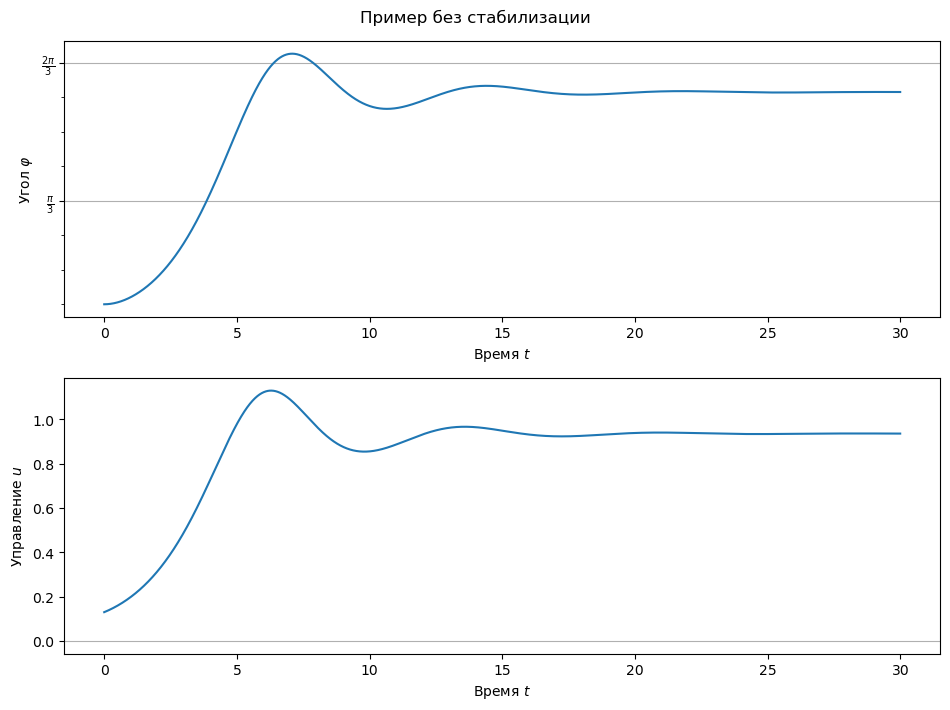

In [13]:
# Управление с k_0 = 0.5, k_1 = 0.4
c = LinearStateControl(2, 1, [0.5, 0.4])
# Численное интегрирование методом Рунге — Кутты с выводом управления
# начальным углом 15° и нулевой начальной скоростью
t, s, u = integrate(p1, c, x0=[pi/12, 0], v0=empty(0), dt=0.01, T=30, N=1,
                    return_control=True)

subplot(2, 1, 1)
plot(t, s[:, 0])
axis_pi_ticks(gca().yaxis, pi/3, pi/12, 3)
grid(axis='y')
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(2, 1, 2)
plot(t, u[:, 0])
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
xlabel(r'Время $t$')
ylabel(r'Управление $u$')
suptitle(r'Пример без стабилизации')
tight_layout();

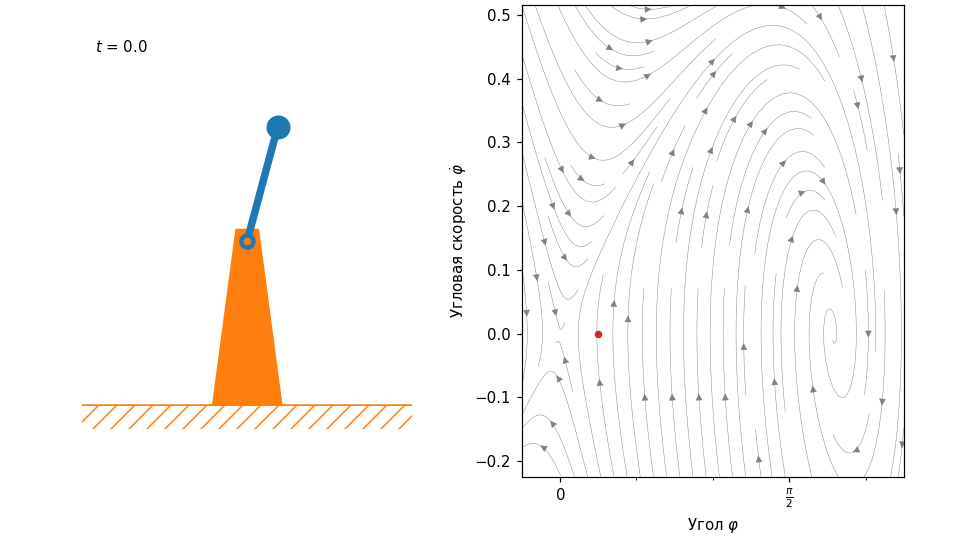

In [14]:
# Построение анимированного изображения gif
anim = animate_pendulum(t, s, phi_lims=(-pi/12, 3*pi/4), phase_portrait=[p1, c],
                        cylinder_mode=False, spacing=30, invsec=1,
                        filename='temp/test4.gif')
Image('temp/test4.gif')

# Раскомментируйте для построения видео mp4 (ffmpeg должен быть установлен)
#anim = animate_pendulum(t, s, phi_lims=(-pi/12, 3*pi/4), phase_portrait=[p1, c],
#                        cylinder_mode=False, spacing=30, invsec=1,
#                        filename='temp/test4.mp4')
#Video('temp/test4.mp4')

# Раскомментируйте для создания анимации на JavaScript
#anim = animate_pendulum(t, s, phi_lims=(-pi/12, 3*pi/4), phase_portrait=[p1, c],
#                        cylinder_mode=False, spacing=30, invsec=1)
#HTML(anim.to_jshtml())

## Пример карты устойчивости для системы $\ddot x + a \dot x + b x = 0$ с четырьмя отмеченными точками

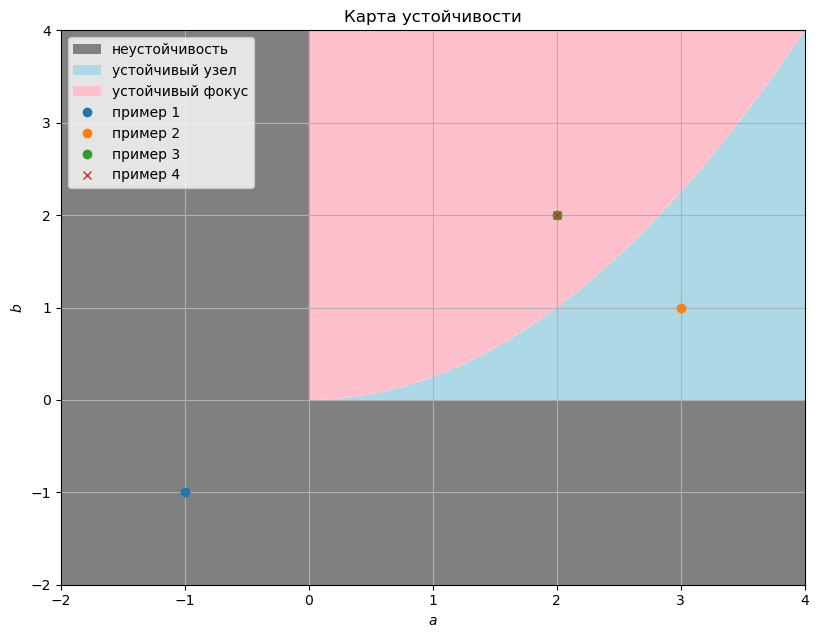

In [16]:
# Определение границ коробки осей
a_min = -2
a_max = 4
b_min = -2
b_max = 4

# Функция fill_between используется для закраски области между двумя кривыми,
# заданными посредством общего набора абсцисс и двумя наборами соответствующих
# этим абсциссам ординат
unstable = fill_between([a_min, 0, 0, a_max], [b_min, b_min, b_min, b_min],
                        [b_max, b_max, 0, 0], fc='grey', label='неустойчивость')

a = linspace(0, a_max, 201) # Эквидистантный массив от 0 до a_max из 101 точки
node = fill_between(a, 0, a**2/4, fc='lightblue', label='устойчивый узел')
focus = fill_between(a, a**2/4, b_max, fc='pink', label='устойчивый фокус')

# Точка в серой области
dot1, = plot([-1], [-1], 'o', label='пример 1')
# Точка в голубой области
dot2, = plot([3], [1], 'o', label='пример 2')
# Точка в розовой области
dot3, = plot([2], [2], 'o', label='пример 3')
# Та же точка в розовой области
dot4, = plot([2], [2], 'x', label='пример 4')

# Установка границ коробки осей
axis([a_min, a_max, b_min, b_max])

xlabel('$a$')
ylabel('$b$')

# Легенда карты
legend(loc='upper left')

grid()
title(r'Карта устойчивости');

## Решение

### 4.1. Ангармоническая стабилизация верхнего положения маятника

In [19]:
# Вставьте и запустите код для построения графиков временной реализации

In [20]:
# Вставьте и запустите код для построения анимации (необязательно)

### 4.2. Квазигармоническая стабилизация верхнего положения маятника

In [22]:
# Вставьте и запустите код для построения графиков временной реализации

In [23]:
# Вставьте и запустите код для построения анимации (необязательно)

### 4.3. Ангармоническая стабилизация верхнего положения маятника посредством управления только по углу

In [25]:
# Вставьте и запустите код для построения графиков временной реализации

In [26]:
# Вставьте и запустите код для построения анимации (необязательно)

### 4.4 Стабилизация верхнего положения маятника из большого начального отклонения

In [28]:
# Вставьте код для построения графиков временной реализации

In [29]:
# Вставьте код для построения анимации (необязательно)

### 4.5. Карта устойчивости с отмеченными точками, соответствующими примерам 4.1 — 4.4

In [31]:
# Вставьте и запустите код для построения карты устойчивости с отмеченными
# точками

### 4.6. Пояснение о числе переколебаний в примере с ангармоническим установлением и управлением только по углу

*Запишите объяснение для рассчитанных зависимостей в пункте 4.3.*

# Задание 5. Динамика угла отклонения при стабилизации перевёрнутого маятника, управляемого горизонтальной силой
<a id="sec:pr5"></a>

Теперь следует попытаться стабилизировать маятник `p2` (c управлением горизонтальной силой). *Попробуйте построить четыре примера из [задания 4](#sec:pr4). Сначала используйте те же самые четыре набора начальных условий и значений коэффициентов $k_0$ и $k_1$ стратегии управления, что и в [задании 4](#sec:pr4). Если эти наборы не позволяют достигнуть необходимых условий измените значения коэффициентов стратегии управления (в примерах 1, 2 и 4) или начального угла отклонения (в примере 3). Поясните, как и почему пришлось изменить значения коэффициентов и начальных условий. Приведите также пример, когда верхнее положение является устойчивым, но маятник к нему не приходит. Поясните, почему это случается для маятника `p2`, но не имело места при рассмотрении маятника `p1`. Также к в [задания 4](#sec:pr4) для выбранных значений $k_0$ и $k_1$ убедитесь в выполнении полученных в [задании 3](#sec:pr3)) условий и отметьте выбранные точки на карте устойчивости в плоскости $(k_0, k_1)$.*

Пример использования функции `integrate` для расчёта маятника с управлением по углу можно увидеть в&nbsp;[приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1).

## Решение

### 5.1. Ангармоническая стабилизация верхнего положения маятника

In [38]:
# Вставьте и запустите код для построения графиков временной реализации

In [39]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.2. Квазигармоническая стабилизация верхнего положения маятника

In [41]:
# Вставьте и запустите код для построения графиков временной реализации

In [42]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.3. Ангармоническая стабилизация верхнего положения маятника посредством управления только по углу

In [44]:
# Вставьте и запустите код для построения графиков временной реализации

In [45]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.4. Стабилизация верхнего положения маятника из большого начального отклонения

In [47]:
# Вставьте и запустите код для построения графиков временной реализации

In [48]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.5. Маятник, не приходящий в верхнее устойчивое положение

In [50]:
# Вставьте и запустите код для построения графиков временной реализации

In [51]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.6. Карта устойчивости с отмеченными точками, соответствующими примерам 5.1 — 5.5

In [53]:
# Вставьте и запустите код для построения карты устойчивости с отмеченными
# точками

### 5.7. Пояснение, как и почему пришлось изменять коэффициенты $k_{0, 1}$ или начальные условия в примерах 5.1 — 5.4 и почему пример 5.5 возможен для маятника `p2`, но не для `p1`

*Запишите объяснение для внесённых изменений в параметры для пунктов 5.1 — 5.4 (по сравнению с 4.1 — 4.4).*

*Запишите объяснение, почему маятник `p2` (в отличие от `p1`) не всегда приходит в верхнее положение, когда оно устойчиво.*

# Задание 6. Фазовые портреты нелинейной системы
<a id="sec:pr6"></a>

Чтобы разобраться в различиях межджу маятниками `p1` и `p2` можно обратиться к фазовым портретам соответствующих замкнутых систем. *С помощью функции `streamplot` библиотеки `matplotlib` постройте на плоскости $(\varphi, \dot\varphi)$ пять фазовых портретов замкнутых нелинейных систем: один потрет с управлением $u = \frac{\Omega^2}2 \varphi$ для маятника `p1` и по два портрета для каждого из маятников с управлением вида $u = k_0 \varphi$ с двумя различными значениями $k_0$: одно отвечает устойчивому узлу в $(\varphi, \dot\varphi) = (0, 0)$, а другое&nbsp;— устойчивому фокусу. Отметьте различными цветами все устойчивые и неустойчивые состояния равновесия. Для сёдел на рисунке постройте устойчивые сепаратрисы. В случае фазовых потретов для маятника `p2` закрасьте область притяжения верхнего положения равновесия.* Пример использования функции `streamplot` приведён в&nbsp;[разделе&nbsp;3.4](supplementary_materials.ipynb#sec:ex_streamplot) приложения.

## Пример построения фазового портрета системы без управления

Система без управления имеет сёдла в точках $\varphi = \varphi_{\mathrm{s}} = 2\pi k$, $\dot\varphi = 0$. Линеаризованное уравнение замкнутой системы имеет вид $\ddot\varphi + \nu\dot\varphi - \Omega^2 (\varphi - \varphi_{\mathrm{s}}) = 0$ с характеристическим квадратным полиномом $Q(p) = p^2 + \nu p - \Omega^2$. Выражение для его отрицательного корня $p_{-} = -\nu/2 - \sqrt{\nu^2/4 + \Omega^2}$ используется ниже при построении сепаратрис.

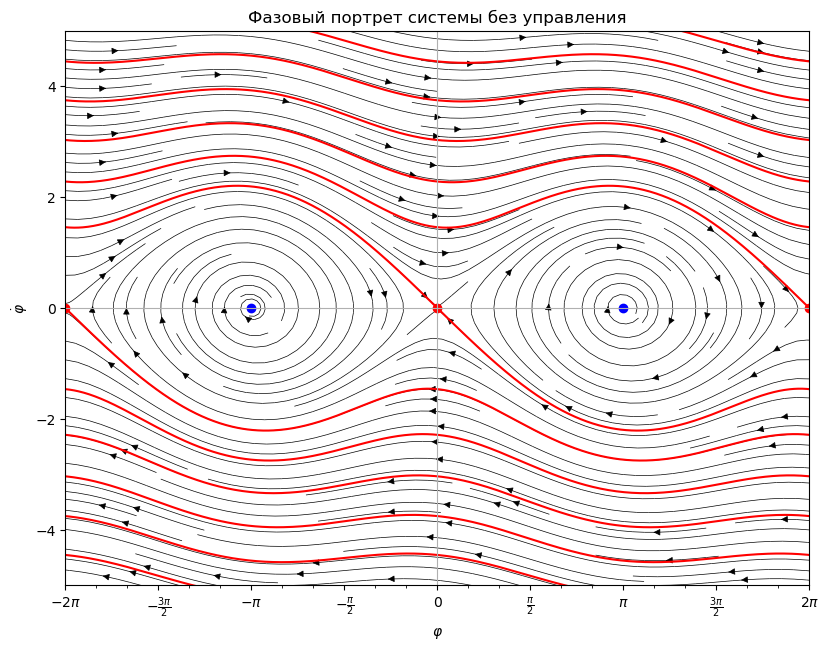

In [61]:
# Определение границ коробки осей
phimin = -2 * pi
phimax = 2 * pi
dphimin = -5
dphimax = 5

# Создание сеток переменных 201 на 201 элемента
phi, dphi = meshgrid(linspace(phimin, phimax, 201),
                     linspace(dphimin, dphimax, 201))

# Вычисление вертикальной компоненты векторного поля (горизонтальная
# компонента равна dphi и её не нужно специально вычислять)
ddphi = p1.omega**2*sin(phi) - p1.nu*dphi

# Построение фазовой плоскости: первые два аргумента задают сетку значений
# абсцисс и ординат, следующие два аргумента задают горизонтальную и
# вертикальную компоненты векторного поля
streamplot(phi, dphi, dphi, ddphi, linewidth=0.5, density=2., color='k')

# Точки устойчивого равновесия
plot([-pi, pi], [0, 0], 'bo')

# Точки неустойчивого равновесия
plot([-2*pi, 0, 2*pi], [0, 0, 0], 'ro')

# Расчёт устойчивой сепаратрисы седла (0, 0), приходящей снизу справа
l = 1e-3 # Малый сдвиг относительно седла по горизонтали
pm = -0.5*p1.nu-sqrt(0.25*p1.nu**2+p1.omega**2) # Отрицательный корень
                                                # характеристического полинома
                                                # уравнения, линеаризованного
                                                # около седла
c = LinearStateControl(2, 1)
t1, s1 = integrate(p1, c, x0=[l, l*pm], v0=empty(0), dt=-0.01, T=-50, N=1,
                   stop_condition=lambda x, t: abs(x[1]) > 7.)

# Расчёт устойчивой сепаратрисы седла (0, 0), приходящей сверху слева
t2, s2 = integrate(p1, c, x0=[-l, -l*pm], v0=empty(0), dt=-0.01, T=-50, N=1,
                   stop_condition=lambda x, t: abs(x[1]) > 7.)

# Объединение двух сепартрис в одну кривую
s = vstack([s1[::-1], s2])

# Добавление сепаратрис на график с периодическим повторением по горизонтали
for i in range(-6, 7):
    plot(s[:, 0] + 2*pi*i, s[:, 1], 'r')

axis([phimin, phimax, dphimin, dphimax])
axis_pi_ticks(gca().xaxis, pi/2, pi/6)
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
axvline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
xlabel(r'$\varphi$')
ylabel(r'$\dot\varphi$')
title(r'Фазовый портрет системы без управления');

## Пример численного решения уравнения $\sin\varphi = 0.5\varphi$

In [63]:
# Нахождение корня функции sin(phi) - 0.5*phi в интервале (1e-6, pi), на концах
# которого функция принимает значения разных знаков с помощью метода Брента
from scipy.optimize import brentq
brentq(lambda x: sin(x)-0.5*x, 1e-6, pi)

1.895494267033981

## Решение

### 6.1. Фазовый портрет маятника `p1` с управлением  $u = \frac{\Omega^2}2 \varphi$

In [66]:
# Вставьте и запустите код для нахождения нетривиальных состояний равновесия,
# которые присутствуют на фазовом портрете

*Запишите аналитические выражения для отрицательных корней характеристических полиномов уравнений, линеаризованных около сёдел.*

In [68]:
# Вставьте и запустите код для построения фазового портрета

### 6.2. Фазовый портрет маятника `p1` с управлением  $u = k_0 \varphi$ и устойчивым узлом

In [70]:
# Вставьте и запустите код для построения фазового портрета

In [71]:
# Вставьте и запустите код для построения фазового портрета (увеличенный 
# фрагмент около точки (0, 0))

### 6.3. Фазовый портрет маятника `p1` с управлением  $u = k_0 \varphi$ и устойчивым фокусом

In [73]:
# Вставьте и запустите код для построения фазового портрета

### 6.4. Фазовый портрет маятника `p2` с управлением  $u = k_0 \varphi$ и устойчивым узлом

In [75]:
# Вставьте и запустите код для нахождения нетривиальных состояний равновесия,
# которые присутствуют на фазовом портрете

*Запишите аналитические выражения для отрицательных корней характеристических полиномов уравнений, линеаризованных около сёдел.*

In [77]:
# Вставьте и запустите код для построения фазового портрета

In [78]:
# Вставьте и запустите код для построения фазового портрета (увеличенный 
# фрагмент около точки (0, 0))

### 6.5. Фазовый портрет маятника `p2` с управлением  $u = k_0 \varphi$ и устойчивым фокусом

In [80]:
# Вставьте и запустите код для нахождения нетривиальных состояний равновесия,
# которые присутствуют на фазовом портрете

In [81]:
# Вставьте и запустите код для построения фазового портрета